In [50]:
import io
import os 
import re
import pandas as pd
from google.cloud import vision
from google_vision_ai import VisionAI
from google_vision_ai import prepare_image_local, prepare_image_web, draw_boundary, draw_boundary_normalized

In [51]:
# Authentication
os.environ['GOOGLE_APPLICATION_CREDENTIALS']= 'client_file.json'
client = vision.ImageAnnotatorClient()

In [52]:
# prepare the image
def prepare_image_local(image_path):
    try:
        # Loads the image into memory
        with io.open(image_path, 'rb') as image_file:
            content = image_file.read()
        image = vision.Image(content=content)
        return image
    except Exception as e:
        print(e)
        return

In [53]:
# prepare_image_local('/Users/dkAndHus/Desktop/ImagesPOP6/3.jpg')

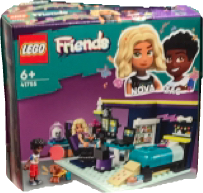

In [54]:
path = '/Users/dkAndHus/Desktop/ImagesPOP6/Cutouts3'
with io.open(image_path,'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dkAndHus/Desktop/ImagesPOP6/download.png'

In [61]:
# with urls

def detect_web(folder_path):
    """Detects web annotations for a list of images."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            file_path = os.path.join(folder_path, filename)
            with io.open(file_path, 'rb') as image_file:
                content = image_file.read()

            image = vision.Image(content=content)

            response = client.web_detection(image=image)
            annotations = response.web_detection
#             if annotations.pages_with_matching_images:
#                     print('\n{} Pages with matching images found:'.format(
#                         len(annotations.pages_with_matching_images)))

#                     for page in annotations.pages_with_matching_images:
#                         print('\n\tPage url   : {}'.format(page.url))

#                         if page.full_matching_images:
#                             print('\t{} Full Matches found: '.format(
#                                    len(page.full_matching_images)))

#                         if page.partial_matching_images:
#                             print('\t{} Partial Matches found: '.format(
#                                    len(page.partial_matching_images)))

            if annotations.web_entities:
                print('\nWeb entities found for image {}: '.format(file_path))
                for i, entity in enumerate(annotations.web_entities[:3], 1):
                    print('\nEntity {}:'.format(i))
                    print('\tScore      : {}'.format(entity.score))
                    print(u'\tDescription: {}'.format(entity.description))
            else:
                print('\nNo web entities found for image {}'.format(file_path))

In [62]:
detect_web(path)


Web entities found for image /Users/dkAndHus/Desktop/ImagesPOP6/Cutouts3/download (22).png: 

Entity 1:
	Score      : 0.820050060749054
	Description: Lego Friends 41755 Nova's Room

Entity 2:
	Score      : 0.7754999995231628
	Description: LEGO 41724 Friends Paisley's House

Entity 3:
	Score      : 0.7751700282096863
	Description: LEGO 41732 Friends Downtown Flower and Design Stores

Web entities found for image /Users/dkAndHus/Desktop/ImagesPOP6/Cutouts3/download (34).png: 

Entity 1:
	Score      : 0.9200000166893005
	Description: LEGO 76208 Marvel The Goat Boat

Entity 2:
	Score      : 0.7437000274658203
	Description: 

Entity 3:
	Score      : 0.7437000274658203
	Description: LEGO

Web entities found for image /Users/dkAndHus/Desktop/ImagesPOP6/Cutouts3/download (18).png: 

Entity 1:
	Score      : 1.04887056350708
	Description: LEGO

Entity 2:
	Score      : 0.831820011138916
	Description: LEGO 41728 Friends Heartlake Downtown Diner

Entity 3:
	Score      : 0.7824300527572632
	Descrip


Web entities found for image /Users/dkAndHus/Desktop/ImagesPOP6/Cutouts3/download (4).png: 

Entity 1:
	Score      : 0.8291800022125244
	Description: LEGO 41735 Friends Mobile Tiny House

Entity 2:
	Score      : 0.7247999906539917
	Description: 

Entity 3:
	Score      : 0.7247999906539917
	Description: LEGO

Web entities found for image /Users/dkAndHus/Desktop/ImagesPOP6/Cutouts3/download (27).png: 

Entity 1:
	Score      : 0.745199978351593
	Description: LEGO 10313 Icons Wildflower Bouquet

Entity 2:
	Score      : 0.7391999959945679
	Description: LEGO 10313 Wildflower Bouquet

Entity 3:
	Score      : 0.7285000085830688
	Description: 

Web entities found for image /Users/dkAndHus/Desktop/ImagesPOP6/Cutouts3/download (31).png: 

Entity 1:
	Score      : 0.82819002866745
	Description: 41719 LEGO Friends Mobile Fashion Boutique

Entity 2:
	Score      : 0.7229999899864197
	Description: 

Entity 3:
	Score      : 0.7229999899864197
	Description: LEGO

Web entities found for image /Users/dkAn

In [41]:
# without URLs

def detect_object(folder_path):
    """Detects web annotations for a list of images."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            file_path = os.path.join(folder_path, filename)
            with io.open(file_path, 'rb') as image_file:
                content = image_file.read()

            image = vision.Image(content=content)

            response = client.web_detection(image=image)
            annotations = response.web_detection
            if annotations.web_entities:
                print('\nWeb entities found for image {}: '.format(file_path))
                for i, entity in enumerate(annotations.web_entities[:5], 1):
                    print('\nEntity {}:'.format(i))
                    print('\tScore      : {}'.format(entity.score))
                    print(u'\tDescription: {}'.format(entity.description))
            else:
                print('\nNo web entities found for image {}'.format(file_path))

In [42]:
detect_object(path)


Web entities found for image /Users/dkAndHus/Desktop/ImagesPOP6/Cutouts2/download (1).png: 

Entity 1:
	Score      : 1.0217900276184082
	Description: LEGO 41735 Friends Mobile Tiny House

Entity 2:
	Score      : 0.751300036907196
	Description: LEGO 41732 Friends Downtown Flower and Design Stores

Entity 3:
	Score      : 0.7296000123023987
	Description: 

Entity 4:
	Score      : 0.7296000123023987
	Description: LEGO

Entity 5:
	Score      : 0.7034000158309937
	Description: The Lego Group

Web entities found for image /Users/dkAndHus/Desktop/ImagesPOP6/Cutouts2/download (22).png: 

Entity 1:
	Score      : 1.038350224494934
	Description: LEGO

Entity 2:
	Score      : 0.830280065536499
	Description: LEGO 41728 Friends Heartlake Downtown Diner

Entity 3:
	Score      : 0.7753900289535522
	Description: LEGO Friends 41705 Heartlake City Pizzeria

Entity 4:
	Score      : 0.7493200302124023
	Description: LEGO Friends 41719 Mobile Fashion Boutique

Entity 5:
	Score      : 0.7204999923706055
	Des


Web entities found for image /Users/dkAndHus/Desktop/ImagesPOP6/Cutouts2/download (9).png: 

Entity 1:
	Score      : 0.7307000160217285
	Description: LEGO

Entity 2:
	Score      : 0.7307000160217285
	Description: 

Entity 3:
	Score      : 0.7294999957084656
	Description: LEGO 43207 Disney Ariel’s Underwater Palace

Entity 4:
	Score      : 0.724399983882904
	Description: Ariel's Underwater Palace LEGO Disney 43207

Entity 5:
	Score      : 0.7039999961853027
	Description: Disney

Web entities found for image /Users/dkAndHus/Desktop/ImagesPOP6/Cutouts2/download (30).png: 

Entity 1:
	Score      : 0.986549973487854
	Description: Lego Marvel Super Heroes

Entity 2:
	Score      : 0.9692000150680542
	Description: LEGO 76191 Marvel Infinity Gauntlet

Entity 3:
	Score      : 0.7233999967575073
	Description: ﻿Światła LED do Lego Rękawica Nieskończoności Thanosa 76191 Marvel

Entity 4:
	Score      : 0.7146999835968018
	Description: LEGO Marvel 76223 Nano Gauntlet

Entity 5:
	Score      : 0.71399